In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from  matplotlib.ticker import PercentFormatter
from math import pi

In [2]:
df = pd.read_csv('Speed Dating Data.csv')
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [3]:
df.isna().sum().sort_values(ascending=False)

num_in_3    7710
numdat_3    6882
expnum      6578
sinc7_2     6423
amb7_2      6423
            ... 
wave           0
condtn         0
idg            0
gender         0
dec            0
Length: 195, dtype: int64

Nombre de participant sur homme et femme

In [4]:
df['career_c'] = df['career_c'].apply(lambda x: 'Lawyer' if x == 1 else('Academic/Research ' if x == 2 else('Psychologist' if x == 3 else('Doctor' if x == 4 else('Engineer' if x == 5 else('Creative Arts' if x == 6 else('Business' if x == 7 else('Real Estate' if x == 8 else ('International' if x== 9 else('Undecided' if x== 10 else('Social Work' if x == 11 else('Speech Pathology' if x  == 12 else('Politics' if x == 13 else ('Pro sports' if x == 14 else('Other' if x == 15 else('Journalism' if x == 16 else ('Architecture' if x == 17 else 'Unknown')))))))))))))))))
df['career_c'] = df['career_c'].astype('category')


df['race']=df['race'].replace([1,2,3,4,5,6],['Black','White','Hispanic','Asian','Original American','Other'])

In [5]:
df_temp = pd.pivot_table(df,index=df['iid'],)
df_temp['age'] = df_temp['age'].fillna(df_temp['age'].mean())


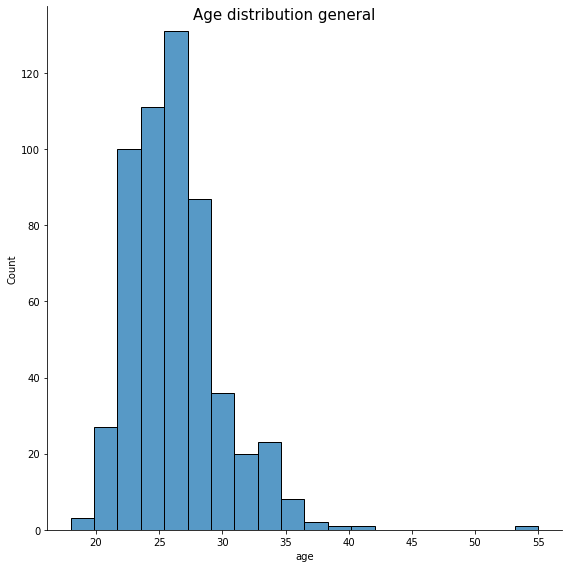

In [6]:
fig= sns.displot(data=df_temp,x=df_temp['age'],bins=20,height= 8);
fig.fig.suptitle('Age distribution general', fontsize=15);


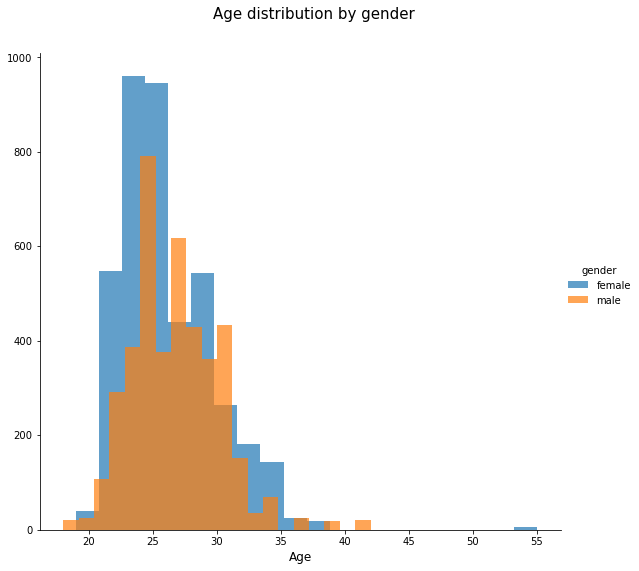

In [7]:
df['gender']=df['gender'].replace(0,'female')
df['gender']=df['gender'].replace(1,'male')
fig = sns.FacetGrid(df, hue='gender', height = 8);
fig.map(plt.hist, 'age', alpha= 0.7, bins=20);
fig.set_xlabels('Age', fontsize=12);
plt.subplots_adjust(top=0.9);
fig.fig.suptitle('Age distribution by gender', fontsize=15);
fig.add_legend();

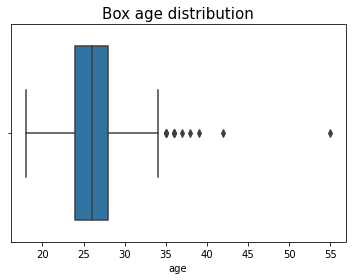

In [8]:

fig = sns.boxplot(data = df_temp,x=df_temp['age']);
plt.title('Box age distribution', fontsize=15);


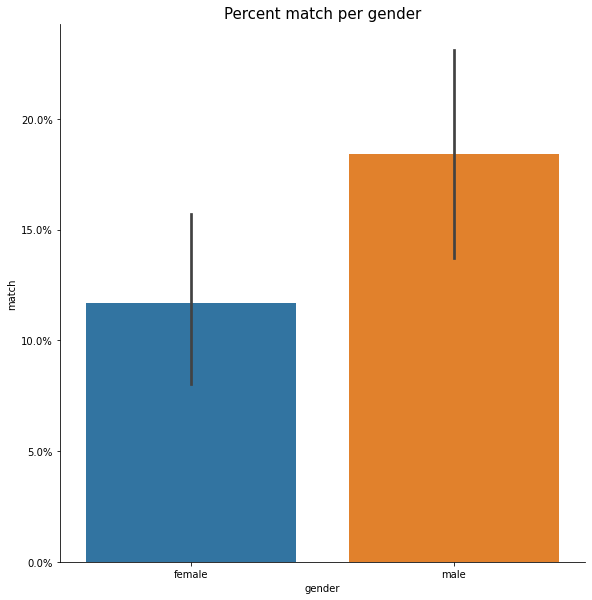

In [9]:
count_gender = df.groupby(['iid']).first()[['gender','match']]
count_gender
g = sns.catplot(data=count_gender,x='gender',y='match',kind='bar',height= 8)
plt.title('Percent match per gender', fontsize=15);
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

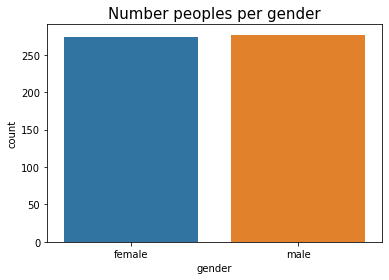

In [10]:
sns.countplot(data=count_gender,x='gender');
plt.title('Number peoples per gender', fontsize=15);

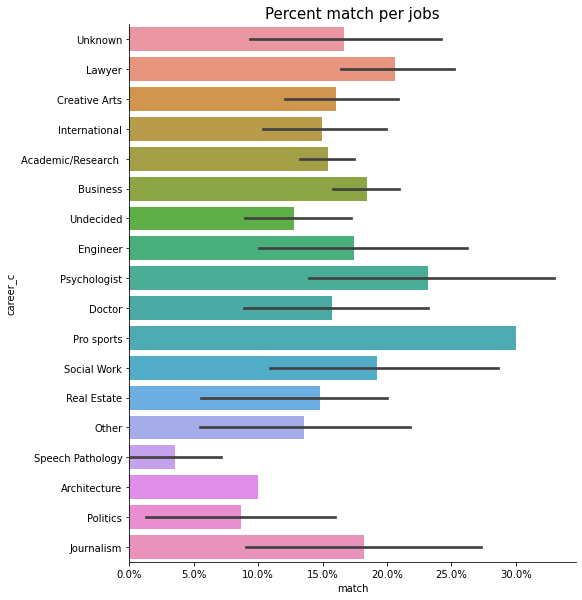

In [11]:
groupby_management = df.groupby(by='iid').agg({'match': 'mean', 'career_c':'first', 'imprace' : 'first'})


g= sns.catplot(data = groupby_management, y = groupby_management['career_c'],x= groupby_management['match'],kind='bar',height= 8);

plt.title('Percent match per jobs', fontsize=15);
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(PercentFormatter(1))

plt.show()


In [12]:
groupby_management['career_c'].value_counts()

Academic/Research     152
Business              144
Lawyer                 47
Creative Arts          46
International          35
Doctor                 26
Undecided              25
Psychologist           17
Social Work            14
Engineer               14
Unknown                12
Other                   5
Politics                5
Real Estate             3
Speech Pathology        2
Journalism              2
Architecture            1
Pro sports              1
Name: career_c, dtype: int64

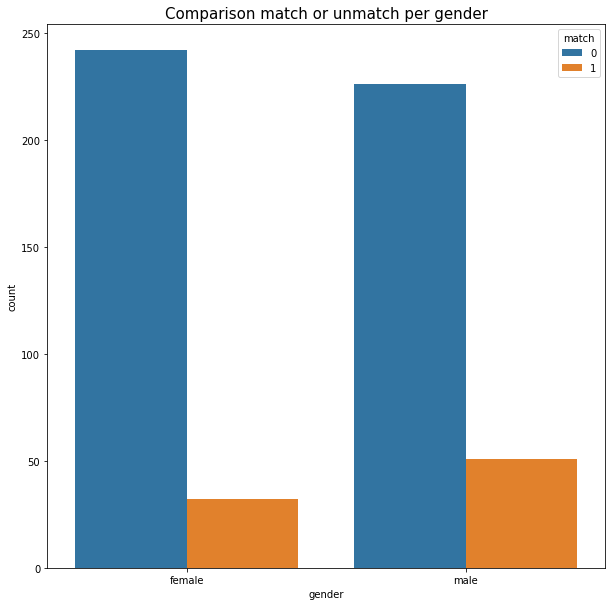

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(data= count_gender,x='gender',hue='match');
plt.title('Comparison match or unmatch per gender', fontsize=15);

In [14]:
race = df.groupby(by='iid').first()[['race','match']]
race



,race,match
iid,,
1,Asian,0
2,White,0
3,White,0
4,White,0
5,White,0
...,...,...
548,White,1
549,White,0
550,White,0


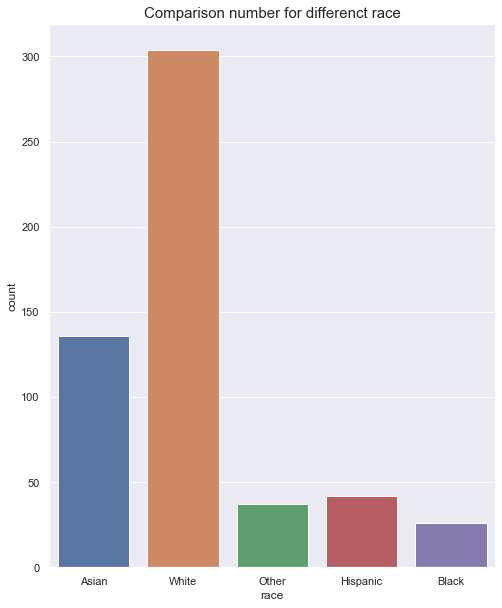

In [15]:
sns.set(rc={'figure.figsize':(8,10)})
sns.countplot(data=race,x='race');

plt.title('Comparison number for differenct race', fontsize=15);



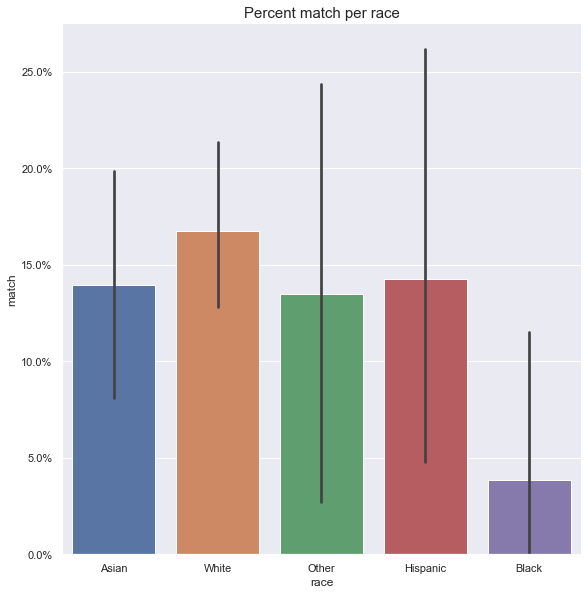

In [16]:
sns.set(rc={'figure.figsize':(8,10)})
g=sns.catplot(data=race,x='race',y='match',kind='bar',height= 8)
plt.title('Percent match per race', fontsize=15);

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))


plt.show()

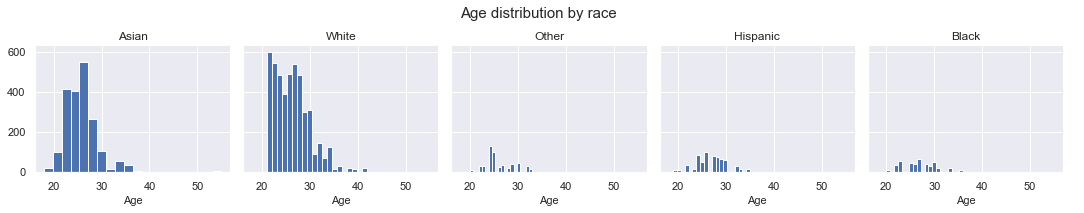

In [17]:
g = sns.FacetGrid(df, col='race', height=3)
g.map(plt.hist, 'age', bins=20)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('Age', fontsize=11)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=15)
g.add_legend();

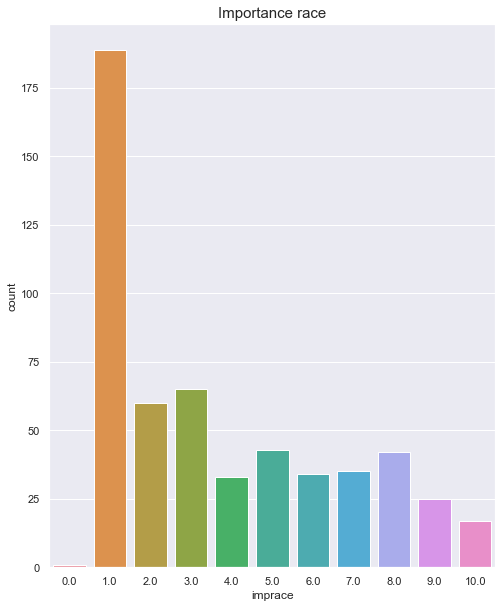

In [18]:
sns.countplot(data = groupby_management , x = groupby_management['imprace']);
plt.title('Importance race', fontsize=15);


Que recherche les sujets chez les sexes opposés au debut de l'event

In [19]:
preference = df.groupby(['iid','pid']).agg({'match':'first','gender':'first','pf_o_att':'first','pf_o_sin':'first','pf_o_int':'first','pf_o_fun':'first','pf_o_amb':'first','pf_o_sha':'first'})
preference

match  gender  pf_o_att  pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  \
iid pid                                                                      
1   11.0       0  female      35.0      20.0      20.0      20.0       0.0   
    12.0       0  female      60.0       0.0       0.0      40.0       0.0   
    13.0       1  female      19.0      18.0      19.0      18.0      14.0   
    14.0       1  female      30.0       5.0      15.0      40.0       5.0   
    15.0       1  female      30.0      10.0      20.0      10.0      10.0   
...          ...     ...       ...       ...       ...       ...       ...   
552 526.0      0    male      10.0      10.0      30.0      20.0      10.0   
    527.0      0    male      50.0      20.0      10.0       5.0      10.0   
    528.0      0    male      40.0      10.0      30.0      10.0      10.0   
    529.0      0    male      10.0      25.0      25.0      10.0      10.0   
    530.0      0    male      20.0      20.0      10.0      15.0       5.0   

           pf_o_sha  
iid pid              
1   11.0        5.0  
    12.0        0.0  
    13.0       12.0  
    14.0        5.0  
    15.0       20.0  
...             ...  
552 526.0      15.0  
    527.0       5.0  
    528.0       NaN  
    529.0      20.0  
    530.0      30.0  

[8368 rows x 8 columns]

In [20]:
mean_preference_per_gender=    preference.groupby('gender').mean()
mean_preference_per_gender

,match,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
gender,,,,,,,
female,0.164914,26.893883,16.497231,19.545869,17.769880,8.554378,10.996568
male,0.164914,18.055224,18.305008,21.002502,17.147292,12.827222,12.704194


In [21]:
mean_preference_per_gender.columns = ['match','Attractive','Sincere','Intelligent','Fun','Ambitious','Interest']

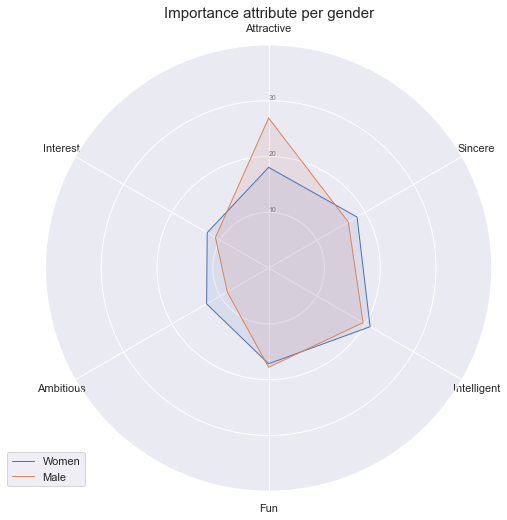

In [22]:

categories=list(mean_preference_per_gender)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? ot(we divide the pl / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels


plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)

values=mean_preference_per_gender.loc['male',:][1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Women")
ax.fill(angles, values, 'b', alpha=0.1)

values=mean_preference_per_gender.loc['female',:][1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Male")
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Importance attribute per gender', fontsize=15)
plt.subplots_adjust(top=2)


# Show the graph
plt.show()


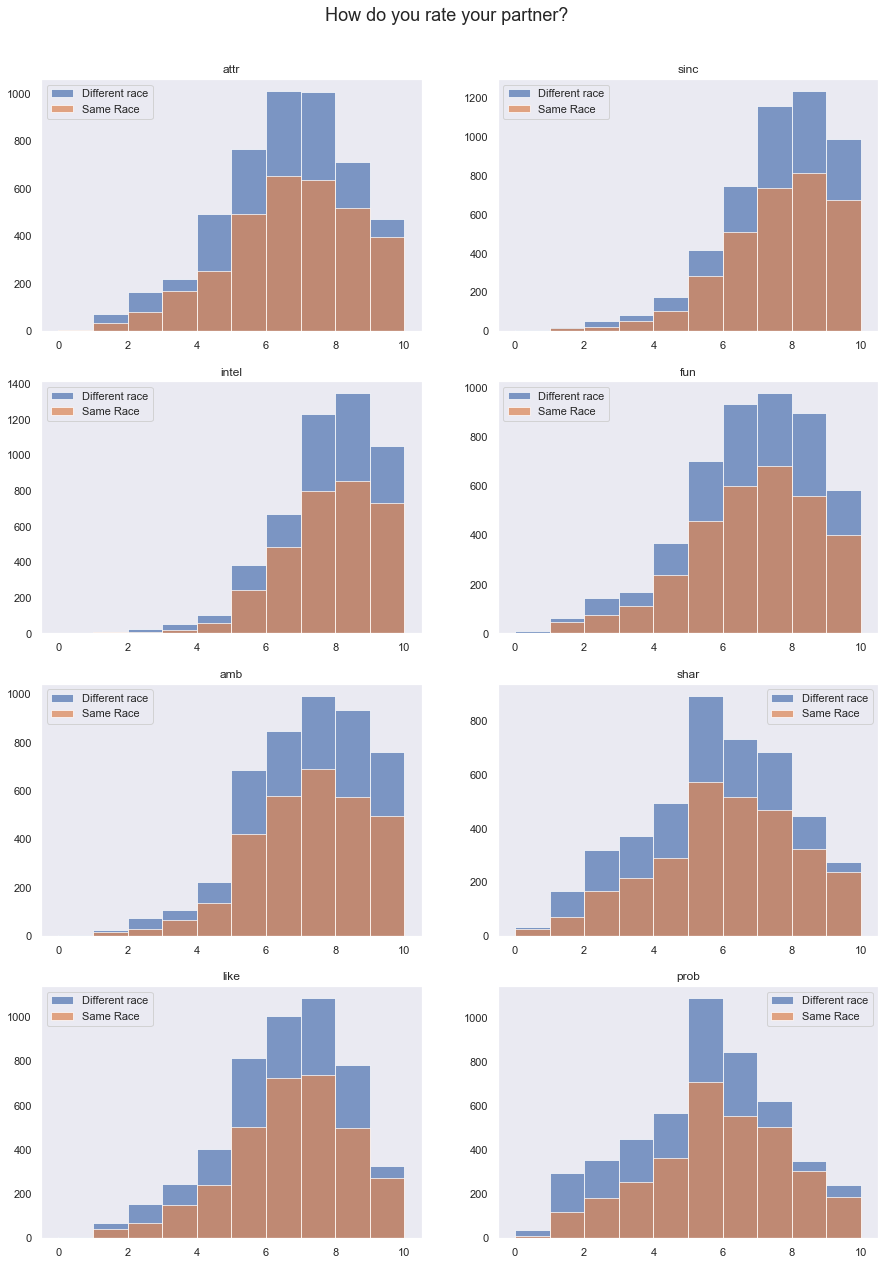

In [23]:
feats = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']

num = len(feats)
rows = int(num/2) + (num % 2 > 0)
fig, ax = plt.subplots(rows, 2, figsize=(15, 5 * (rows)))
i = 0
j = 0
for feat in feats:
    df[df.samerace==0][feat].hist(label='Different race', ax=ax[i][j], bins=10, alpha=0.7)
    df[df.samerace==1][feat].hist(label='Same Race', ax=ax[i][j], bins=10, alpha=0.7)
    ax[i][j].set_title(feat, fontsize=12)
    ax[i][j].grid(False)
    ax[i][j].legend()
    j = (j+1)%2
    i = i + 1 - j

plt.subplots_adjust(top=0.93)
fig.suptitle('How do you rate your partner?', fontsize=18);